<a href="https://colab.research.google.com/github/engy7/ResNet-50-/blob/master/ResNet_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install kaggle library


  Preparing metadata (setup.py) ... done
  Created wheel for library: filename=Library-0.0.0-py3-none-any.whl size=2054 sha256=92e05917b22cf70460ae85ca8950043805d5a167329c3e21393f7e2435f30253
  Stored in directory: /root/.cache/pip/wheels/e0/71/7d/b0e29b944e43374597cd4e3b88c85197001c9bfcd5dce191f4
Successfully built library


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!mkdir ~/.kaggle

In [7]:
!cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [8]:
!kaggle datasets download -d yousefradwanlmao/driver-gaze-rgb-dataset-lisa-v1-v2

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [9]:
!unzip /content/driver-gaze-rgb-dataset-lisa-v1-v2.zip

unzip:  cannot find or open /content/driver-gaze-rgb-dataset-lisa-v1-v2.zip, /content/driver-gaze-rgb-dataset-lisa-v1-v2.zip.zip or /content/driver-gaze-rgb-dataset-lisa-v1-v2.zip.ZIP.


In [10]:
!cp -r "/content/lisat_gaze_data_v1/lisat_gaze_data_v1" "/content/drive/MyDrive"

cp: cannot stat '/content/lisat_gaze_data_v1/lisat_gaze_data_v1': No such file or directory


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras.layers as tfl

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation

In [12]:
def count_files_in_subfolders(directory):
  for dirpath, dirnames, filenames in os.walk(directory):
    for dirname in dirnames:
      subdir_path = os.path.join(dirpath, dirname)
      file_count = len(os.listdir(subdir_path))
      print(f"Subdirectory: {subdir_path}")
      print(f"Number of files: {file_count}")
      print("-" * 20) # Replace 'path_to_your_directory' with the directory path you want to inspectdirectory_path = 'path_to_your_directory' count_files_in_subfolders(directory_path)

count_files_in_subfolders("/content/lisat_gaze_data_v1")

In [13]:
train = '/content/drive/MyDrive/lisat_gaze_data_v1/train'
val ='/content/drive/MyDrive/lisat_gaze_data_v1/val'

In [14]:
BATCH_SIZE = 32
IMG_SIZE= (224,224)
train_dataset = image_dataset_from_directory(train,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             label_mode='categorical',
                                             seed=42,validation_split=0.8,
                                             subset="training")
val_dataset,test_dataset=image_dataset_from_directory(val,
                                        shuffle=True,
                                        batch_size=BATCH_SIZE,
                                        image_size=IMG_SIZE,
                                        validation_split=0.8,
                                        subset='both',
                                        label_mode='categorical',
                                        seed=42)

Found 25183 files belonging to 8 classes.
Using 5037 files for training.
Found 4822 files belonging to 8 classes.
Using 965 files for training.
Using 3857 files for validation.


In [15]:
preprocess_input = tf.keras.applications.resnet50.preprocess_input

In [16]:
IMG_SHAPE = (224,224,3)
base_model = tf.keras.applications.ResNet50(include_top=True,weights='imagenet',input_shape=IMG_SHAPE)

In [17]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [18]:
nb_layers = len(base_model.layers)
print(base_model.layers[nb_layers - 2].name)
print(base_model.layers[nb_layers - 1].name)

avg_pool
predictions


In [19]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 1000)


In [20]:
label_batch

<tf.Tensor: shape=(32, 8), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [

In [21]:
def eyegaze_model(image_shape=IMG_SIZE):
    ''' Define a tf.keras model for categorical classification out of the ResNet50 model
    Arguments:
        image_shape -- Image width and height
    Returns:
        tf.keras.model
    '''

    input_shape = image_shape + (3,)

    base_model = tf.keras.applications.ResNet50(input_shape=input_shape,
                                                   include_top=False, # set to false dont want early layers
                                                   weights='imagenet')

    # freeze the base model by making it non trainable
    base_model.trainable = False

    # create the input layer (Same as the imageNetv2 input size)
    inputs = tf.keras.Input(shape=input_shape)

    # data preprocessing using the same weights the model was trained on
    x = preprocess_input(inputs)

    # set training to False to avoid keeping track of statistics in the batch norm layer
    x = base_model(x, training=False)

    # use global avg pooling to summarize the info in each channel
    x = tfl.GlobalAveragePooling2D()(x)
    #include dropout with probability of 0.2 to avoid overfitting
    x = tfl.Dropout(0.2)(x)

    # create a prediction layer with 8 neuron (as a classifier only needs eight)
    prediction_layer = tfl.Dense(8, activation='softmax')

    outputs = prediction_layer(x)
    model = tf.keras.Model(inputs, outputs)

    return model

In [22]:
model1 = eyegaze_model(IMG_SIZE)

In [23]:
learning_rate = 3e-4
model1.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [31]:
checkpoint_path = "/content/drive/MyDrive/ResNet50_30_epochs/training/cp.ckpt"


# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
history = model1.fit(train_dataset,
          epochs=15,
          validation_data=val_dataset,
          callbacks=[cp_callback])  # Pass callback to training


Epoch 1/15
158/158 [==============================] - ETA: 0s - loss: 0.5453 - accuracy: 0.8299
Epoch 1: saving model to /content/drive/MyDrive/ResNet50_30_epochs/training/cp.ckpt
158/158 [==============================] - 1353s 9s/step - loss: 0.5453 - accuracy: 0.8299 - val_loss: 0.7691 - val_accuracy: 0.7171
Epoch 2/15
158/158 [==============================] - ETA: 0s - loss: 0.4658 - accuracy: 0.8519
Epoch 2: saving model to /content/drive/MyDrive/ResNet50_30_epochs/training/cp.ckpt
158/158 [==============================] - 1316s 8s/step - loss: 0.4658 - accuracy: 0.8519 - val_loss: 0.9075 - val_accuracy: 0.6933
Epoch 3/15
158/158 [==============================] - ETA: 0s - loss: 0.4133 - accuracy: 0.8716
Epoch 3: saving model to /content/drive/MyDrive/ResNet50_30_epochs/training/cp.ckpt
158/158 [==============================] - 1338s 8s/step - loss: 0.4133 - accuracy: 0.8716 - val_loss: 0.8236 - val_accuracy: 0.6974
Epoch 4/15
158/158 [==============================] - ETA: 0s

In [34]:
model1.save(checkpoint_path)

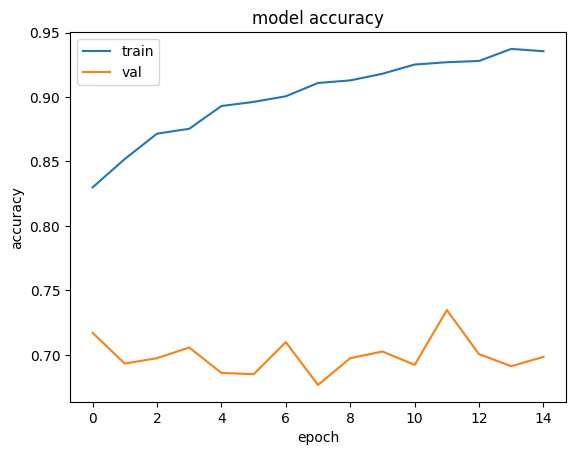

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [36]:
test_loss, test_acc = model1.evaluate(test_dataset, verbose=2)

121/121 - 844s - loss: 0.9801 - accuracy: 0.6985 - 844s/epoch - 7s/step


In [37]:
model2 = eyegaze_model(IMG_SIZE)

In [40]:
learning_rate = 3e-4
model2.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [41]:
model2.load_weights(checkpoint_path)

In [42]:
test_loss, test_acc = model2.evaluate(test_dataset, verbose=2)

121/121 - 863s - loss: 0.9801 - accuracy: 0.6985 - 863s/epoch - 7s/step
